In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/drive/MyDrive/PROJ201/Arranged_Air_Data/"
pm10df = pd.DataFrame()
so2df = pd.DataFrame()
no2df = pd.DataFrame()
o3df = pd.DataFrame()
for i in os.listdir(path):
  df = pd.read_csv(path+i)
  if i.endswith("NO2.csv"):
    df["station"] = i[:i.find("NO2.csv")-1] # -1 for dropping "_"
    no2df = pd.concat([no2df, df])
  elif i.endswith("SO2.csv"):
    df["station"] = i[:i.find("SO2.csv")-1]
    so2df = pd.concat([so2df, df])
  elif i.endswith("PM10.csv"):
    df["station"] = i[:i.find("PM10.csv")-1]
    pm10df = pd.concat([pm10df, df])
  elif i.endswith("O3.csv"):
    df["station"] = i[:i.find("O3.csv")-1]
    o3df = pd.concat([o3df, df])

In [ ]:
describe_table = pd.concat([
    no2df.describe().T,
    so2df.describe().T,
    pm10df.describe().T,
    o3df.describe().T ])
perc_nan = [no2df["NO2"].isnull().sum() / no2df.size * 100,
            so2df["SO2"].isnull().sum() / so2df.size * 100,
            pm10df["PM10"].isnull().sum() / pm10df.size * 100,
            o3df["O3"].isnull().sum() / o3df.size * 100]
"""real_count = [no2df.NO2.size - no2df["NO2"].isnull().sum(),
            so2df["SO2"].isnull().sum() / so2df.size * 100,
            pm10df["PM10"].isnull().sum() / pm10df.size * 100,
            o3df["O3"].isnull().sum() / o3df.size * 100]"""
describe_table["nan_values_perc"] = perc_nan
describe_table

,count,mean,std,min,25%,50%,75%,max,nan_values_perc
NO2,19277.0,35.748282,26.313886,0.000000,16.812500,30.208333,48.408333,275.579167,3.753318
SO2,15657.0,6.325516,13.391194,0.169565,2.433333,3.466667,5.226667,218.004545,8.106148
PM10,20405.0,36.148430,22.348675,0.000000,21.421739,30.663333,44.770833,261.877273,2.022434
O3,13637.0,39.677865,24.111872,0.000000,20.295833,36.710000,55.257083,187.454167,8.917893


In [ ]:
no2df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/NO2df.csv")
so2df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/SO2df.csv")
pm10df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/PM10df.csv")
o3df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/O3df.csv")
describe_table.to_csv("/content/drive/MyDrive/PROJ201/Statistical Graphs/DescribeTableGeneral.csv")

In [ ]:
def makeAnalysis(df):
  analysislst = []
  namelst = []
  for name, df in df.groupby("station"):
    analysislst.append(df.describe().T)
    namelst.append(name)

  analysisdf = pd.concat(analysislst)
  analysisdf["name"] = namelst
  analysisdf = analysisdf.set_index("name")
  return analysisdf

In [ ]:
analysispm10df = makeAnalysis(pm10df)
analysisso2df = makeAnalysis(so2df)
analysisno2df = makeAnalysis(no2df)
analysiso3df = makeAnalysis(o3df)

analysispm10df.to_csv("/content/drive/MyDrive/PROJ201/Statistical Graphs/DescribeTablePM10.csv")
analysisno2df.to_csv("/content/drive/MyDrive/PROJ201/Statistical Graphs/DescribeTableNO2.csv")
analysisso2df.to_csv("/content/drive/MyDrive/PROJ201/Statistical Graphs/DescribeTableSO2.csv")
analysiso3df.to_csv("/content/drive/MyDrive/PROJ201/Statistical Graphs/DescribeTableO3.csv")

In [ ]:
analysispm10df

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Aksaray,1026.0,40.116366,19.302643,2.429167,27.209375,35.872917,48.511458,166.895833
Arnavutkoy,1014.0,34.272502,18.157471,0.000000,21.478487,29.460417,42.485870,133.231818
Bagcilar,1008.0,35.577671,19.141849,3.629412,22.952841,30.989583,42.401042,157.750000
Basaksehir_MTHM,986.0,39.743028,22.214469,6.065000,24.774583,35.318197,46.699896,163.001250
Besiktas,994.0,34.932931,16.480674,6.847826,22.828125,30.929167,43.866304,128.800000
Catladikapi,912.0,29.384522,15.027396,3.718182,19.279167,26.739583,36.505208,116.933333
Esenler,1020.0,35.930778,20.500621,6.733333,22.407292,30.506250,42.784375,167.458333
Goztepe,620.0,76.816652,46.106359,0.000000,42.679167,61.266667,102.428125,261.877273
Kadikoy,1028.0,31.914398,22.541623,2.395833,17.948958,25.283243,38.522917,189.972727


In [ ]:
pm10df = pm10df.reset_index()
no2df = no2df.reset_index()
so2df = so2df.reset_index()

In [ ]:
pm10df = pm10df.drop(pm10df[pm10df.station == "Sile_MTHM"].index)
pm10df = pm10df.drop(pm10df[pm10df.station == "Silivri_MTHM"].index)
no2df = no2df.drop(no2df[no2df.station == "Sile_MTHM"].index)
no2df = no2df.drop(no2df[no2df.station == "Silivri_MTHM"].index)
so2df = so2df.drop(so2df[so2df.station == "Sile_MTHM"].index)
so2df = so2df.drop(so2df[so2df.station == "Silivri_MTHM"].index)

<Axes: xlabel='PM10', ylabel='station'>

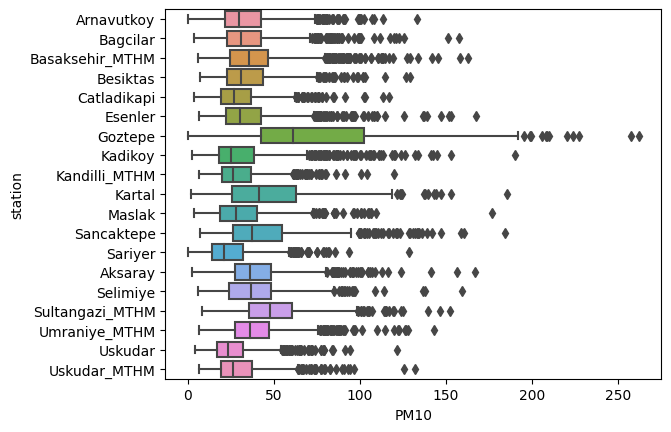

In [ ]:
sns.boxplot(x="PM10", y = "station", data=pm10df)

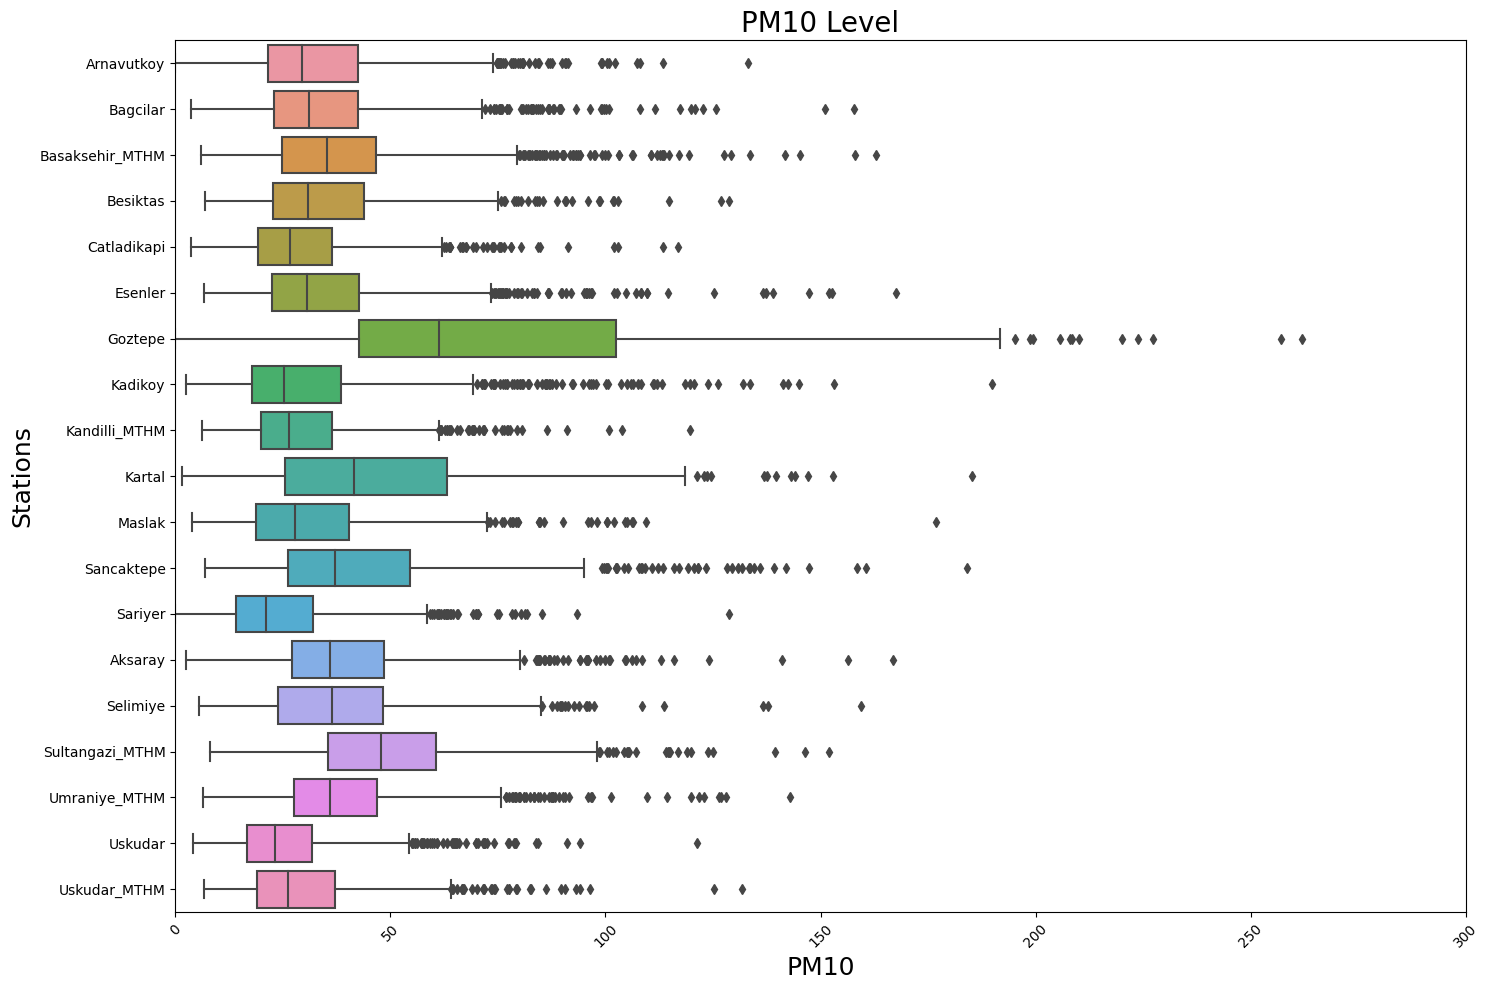

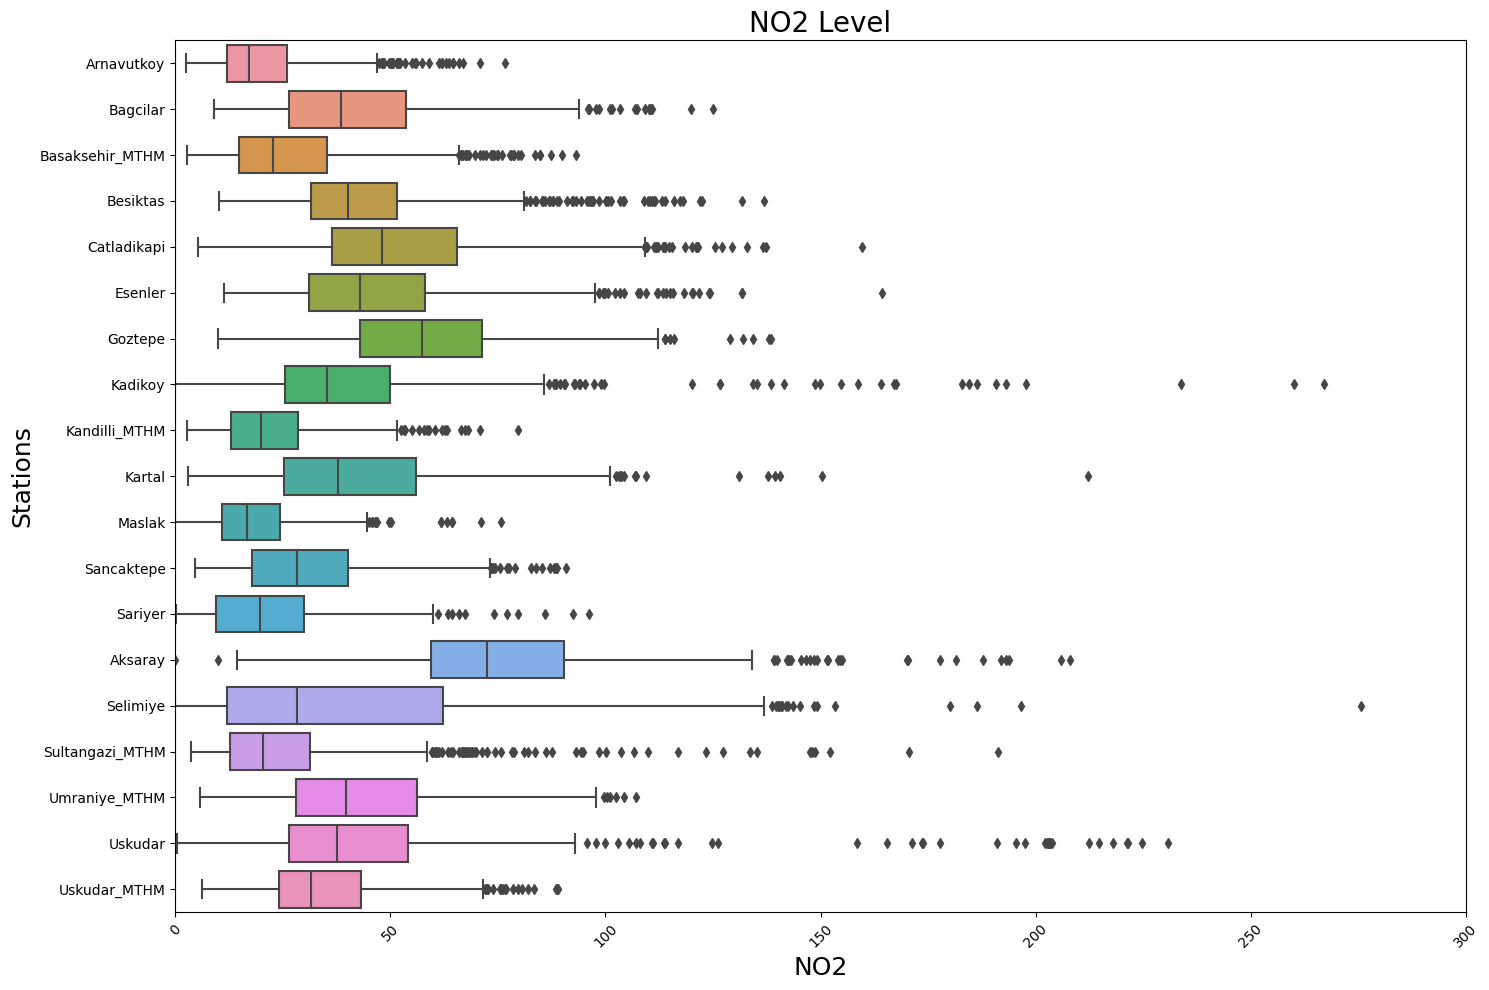

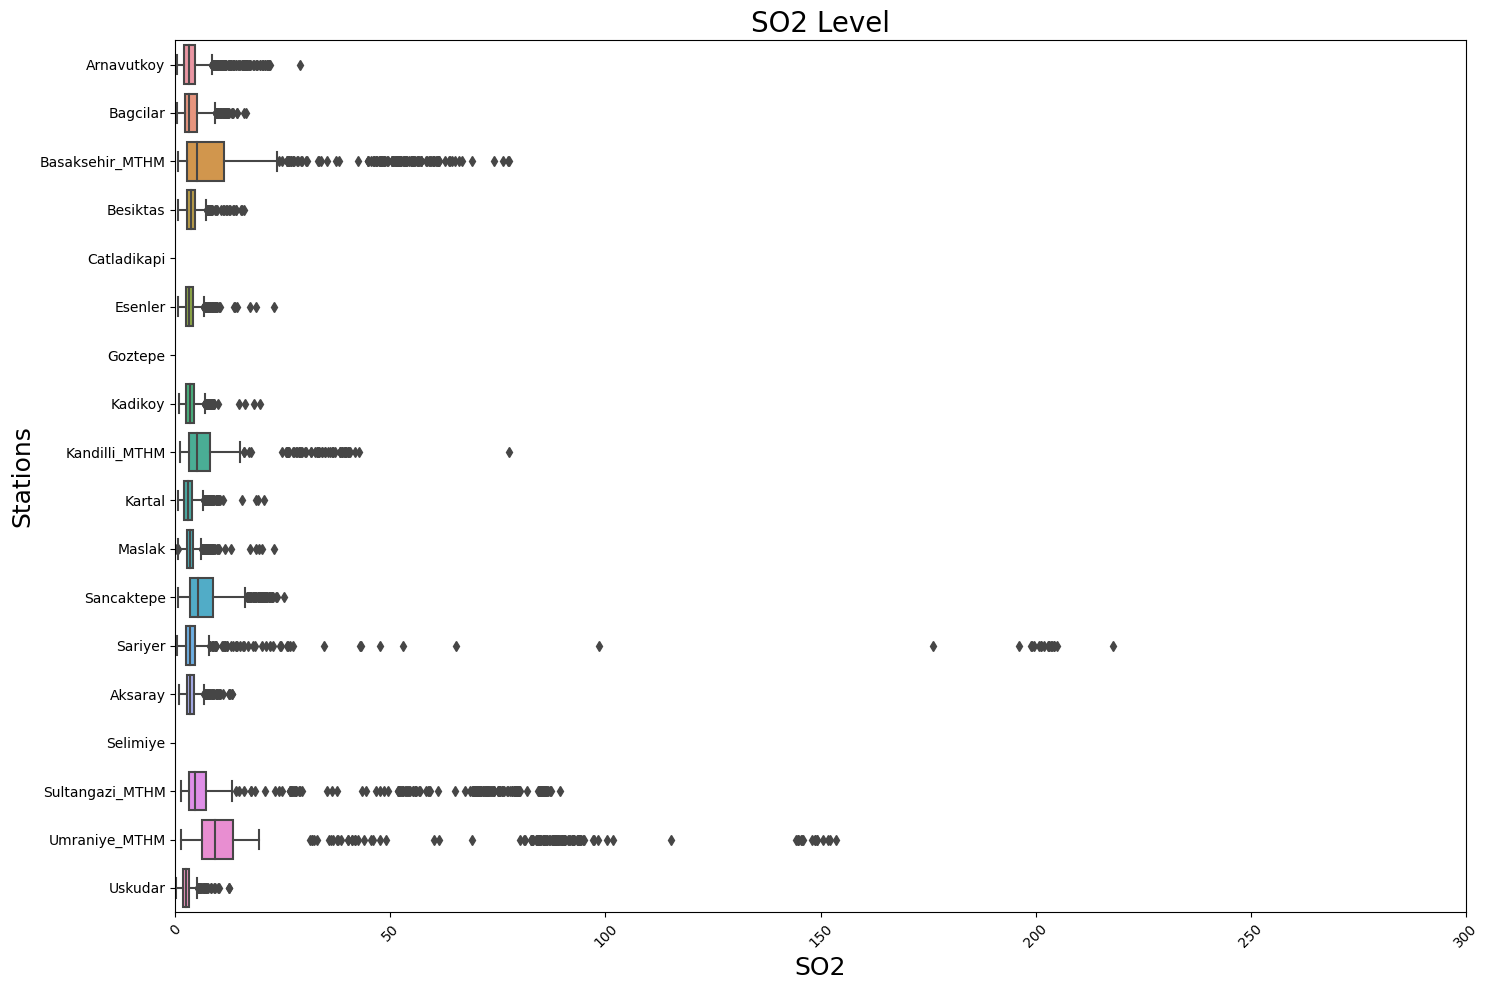

In [ ]:
for i in range(3):
  param = ["PM10", "NO2", "SO2"][i]
  df = [pm10df, no2df, so2df][i]
  f, ax = plt.subplots(figsize = (15,10))
  sns.boxplot(x=param, y = "station", data=df, ax=ax).set_title(param+" Level")
  ax.title.set_size(20)
  ax.set_xlim((0,300))
  ax.set_ylabel("Stations", fontsize=18)
  ax.set_xlabel(param, fontsize=18)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig("/content/drive/MyDrive/PROJ201/Statistical Graphs/"+"{}_per_station_graph.png".format(param.lower()))

  fig = px.line(df, x="station", y=param, title=param)
  fig.write_html("/content/drive/MyDrive/PROJ201/Statistical Graphs/"+"{}_per_station_graph.html".format(param.lower()))
  plt.show()

In [ ]:
path = "/content/drive/MyDrive/PROJ201/Arranged_Air_Data/"
pm10df = pd.DataFrame()
so2df = pd.DataFrame()
no2df = pd.DataFrame()
o3df = pd.DataFrame()
for i in os.listdir(path):
  print()
  df = pd.read_csv(path+i)
  if i.endswith("NO2.csv"):
    no2df[i[:i.find("NO2.csv")-1]] = df["NO2"]# -1 for dropping "_"
  elif i.endswith("SO2.csv"):
    so2df[i[:i.find("SO2.csv")-1]] = df["SO2"]
  elif i.endswith("PM10.csv"):
    pm10df[i[:i.find("PM10.csv")-1]] = df["PM10"]
  elif i.endswith("O3.csv"):
    o3df[i[:i.find("O3.csv")-1]] = df["O3"]
pm10df["date"] = df["date"]
no2df["date"] = df["date"]
so2df["date"] = df["date"]
o3df["date"] = df["date"]

In [ ]:
pm10df

,Arnavutkoy,Bagcilar,Basaksehir_MTHM,Besiktas,Catladikapi,Esenler,Goztepe,Kadikoy,Kandilli_MTHM,Kartal,...,Sariyer,Aksaray,Selimiye,Silivri_MTHM,Sultangazi_MTHM,Sile_MTHM,Umraniye_MTHM,Uskudar,Uskudar_MTHM,date
0,25.941667,25.925000,31.242500,19.933333,13.704167,20.916667,NaN,18.258333,22.349583,22.291667,...,21.737500,25.437500,18.033333,32.529583,26.277917,31.722917,30.826667,13.183333,29.860833,2021-01-01
1,62.225000,81.541667,92.457500,35.054167,45.058333,62.891667,NaN,90.008333,61.310833,20.662500,...,28.608333,95.937500,NaN,86.983333,72.842500,36.087083,85.812083,45.733333,62.365417,2021-01-02
2,57.266667,89.233333,85.173333,35.954167,43.308333,55.866667,NaN,100.679167,80.492917,19.220833,...,38.262500,116.030435,NaN,76.147500,73.430000,44.968333,73.212500,43.254167,65.553750,2021-01-03
3,100.254167,108.129167,163.001250,59.229167,47.200000,74.662500,NaN,113.208333,100.761250,26.558333,...,43.891667,86.966667,NaN,91.884167,87.114583,50.988750,82.474167,53.316667,94.112083,2021-01-04
4,32.204545,44.669565,55.935833,32.352174,25.234783,42.329167,NaN,36.195652,46.869167,25.336364,...,30.630435,49.854167,20.378261,32.547500,46.777500,28.254167,44.895833,21.860870,45.855556,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,53.175000,59.870833,69.430417,57.250000,59.050000,47.586957,158.89500,56.950000,63.087500,50.541667,...,59.737500,60.273913,73.200000,48.738750,61.447917,35.473750,70.873333,54.108333,NaN,2023-10-28
1031,34.504167,44.275000,39.699583,44.762500,38.641667,40.591667,158.39000,53.620833,47.901667,63.941667,...,37.479167,55.512500,64.682609,28.493750,47.599167,19.633333,56.786667,42.050000,NaN,2023-10-29
1032,NaN,38.404167,44.291667,28.775000,27.870833,27.612500,72.72500,30.395833,28.860417,42.895833,...,19.387500,40.808333,50.679167,22.492500,48.420417,24.467917,44.938333,31.704167,NaN,2023-10-30
1033,59.050000,57.962500,76.285833,52.029167,41.504167,49.454167,165.83913,51.312500,50.362917,64.179167,...,40.945833,61.204167,75.695833,42.651250,59.175000,34.074167,68.599167,57.520833,58.200000,2023-10-31


In [ ]:
no2df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/NO2df_stat.csv")
so2df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/SO2df_stat.csv")
pm10df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/PM10df_stat.csv")
o3df.to_csv("/content/drive/MyDrive/PROJ201/Arranged_Compact_Air_Data/O3df_stat.csv")